In [3]:
import os
import yaml
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from glob import glob
from pprint import pprint

from mejiro.instruments.jwst import JWST
from mejiro.utils import util
from mejiro.engines.stpsf_engine import STPSFEngine

# read configuration file
import mejiro
config_file = os.path.join(os.path.dirname(mejiro.__file__), 'data', 'mejiro_config', 'jwst.yaml')
with open(config_file, 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

if config['dev']:
    config['pipeline_label'] += '_dev'

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-068 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-071
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


In [2]:
jwst = JWST()
bands = jwst.bands

In [5]:
for band in bands:
    psf = STPSFEngine.get_jwst_psf(band, oversample=1, num_pix=41, check_cache=False, psf_cache_dir=None, verbose=True)
    np.save(f'{band}_1_41.npy', psf)

Generating PSF with STPSF, which may be slow. Consider caching frequently-used PSFs.
Generating PSF with STPSF, which may be slow. Consider caching frequently-used PSFs.
Generating PSF with STPSF, which may be slow. Consider caching frequently-used PSFs.
Generating PSF with STPSF, which may be slow. Consider caching frequently-used PSFs.
Generating PSF with STPSF, which may be slow. Consider caching frequently-used PSFs.
Generating PSF with STPSF, which may be slow. Consider caching frequently-used PSFs.


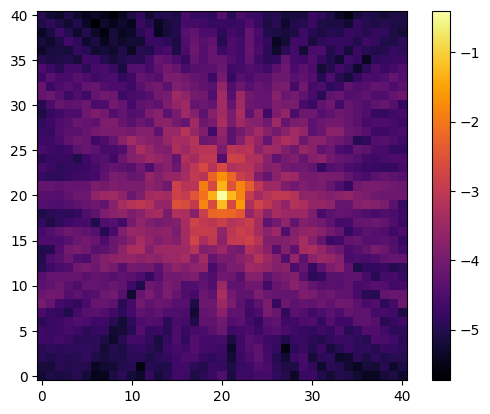

In [6]:
sample = np.load('F115W_1_41.npy')

plt.imshow(np.log10(sample), origin='lower', cmap='inferno')
plt.colorbar()
plt.show()